# Multilayer Perceptron

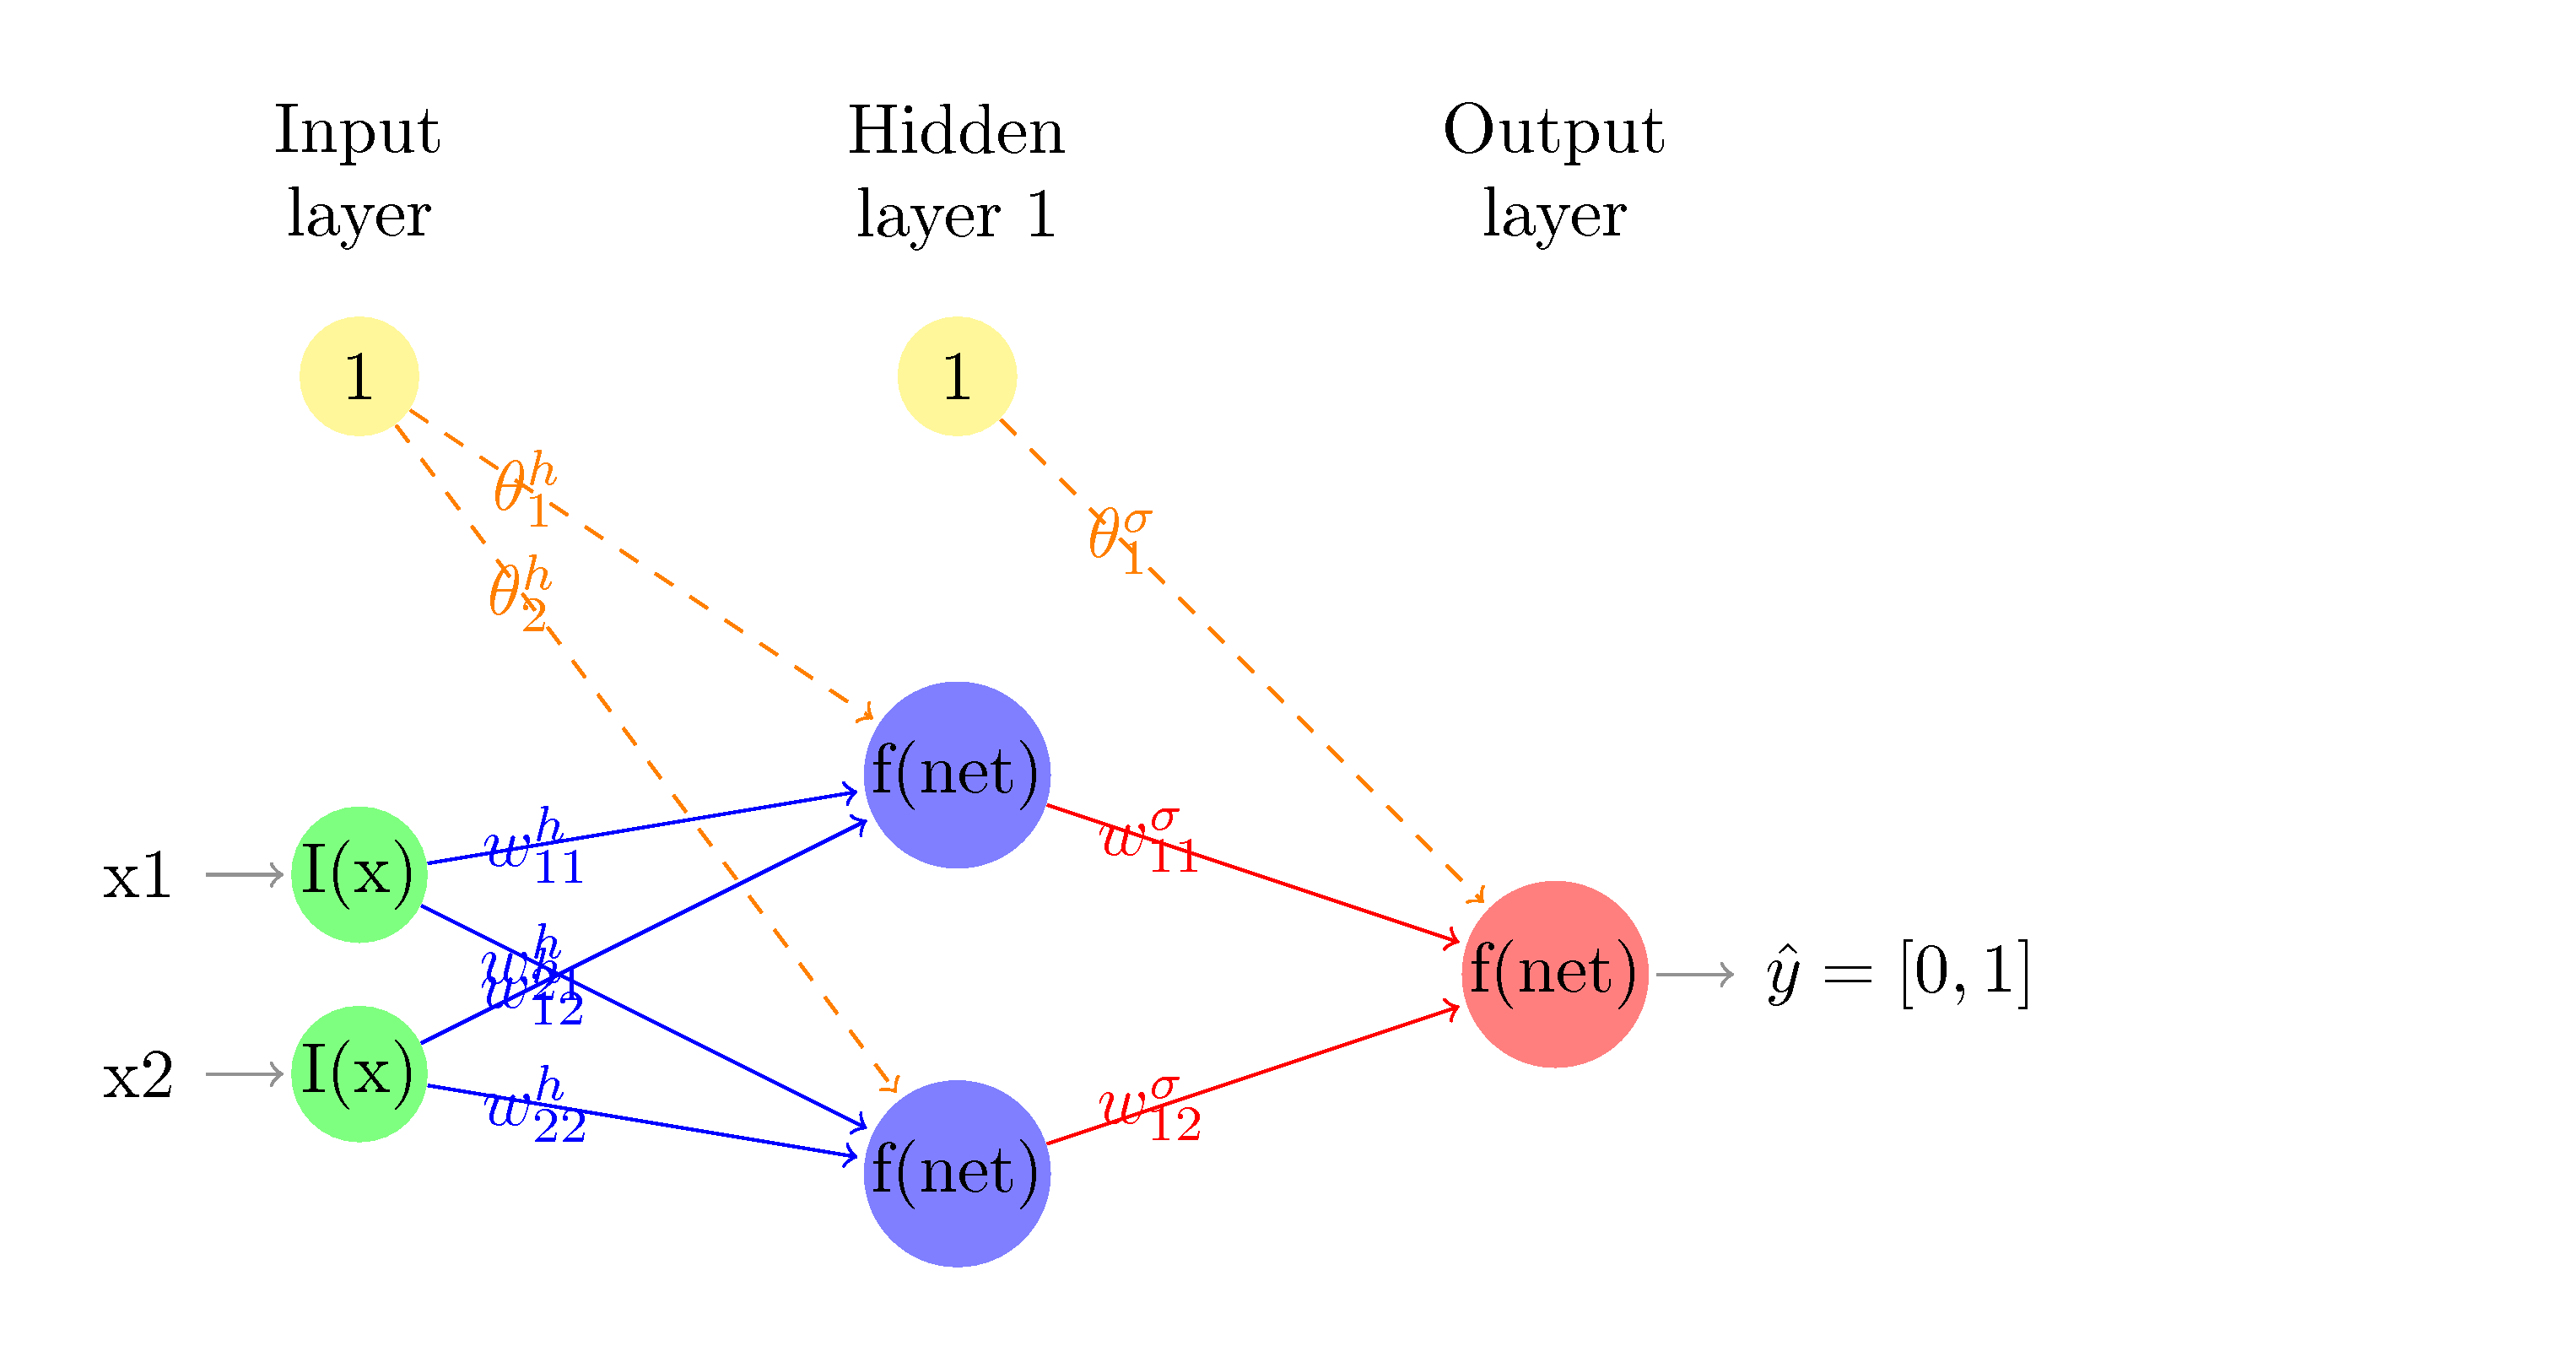

#### Sigmoid Function 

$net = x_{1}w_{11}^{h} + x_{2}w_{12}^{h} + 1\theta_{1}^h$

$f(net) = \frac{1}{1 + exp(-net)}$

Qualquer valor maior do que um certo valor de net eu vou produzir um como resposta, e menor do que um certo valor vou produzir 0, y en medio tenho uma região de incerteza que ficam infinitos valores dentro del intervalo de 0 e 1.

In [32]:
sigmoid = function(x) {
   1 / (1 + exp(-x))
}

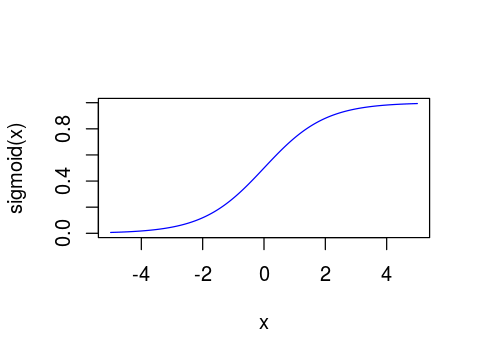

In [35]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)
x <- seq(-5, 5, 0.01)
plot(x, sigmoid(x), col='blue',type="l")

Precisamos treinar cada:

peso $w$

bias $\theta$

O treinamento pode gerar dos hiperplanos aleatorios, ele tem que fazer que esses hiperplanos se adaptem, para que ha camada de saida reconheça que uma area que é menor do que esse hiperplano 2 e mayor de que hiperplano 1 vai ser toda uma area de números positivos, e uma area que e maior do que hiperplano 2 e menor do que hiperplano 1 vai ser uma area de numeros negativos.

## Camada de saida
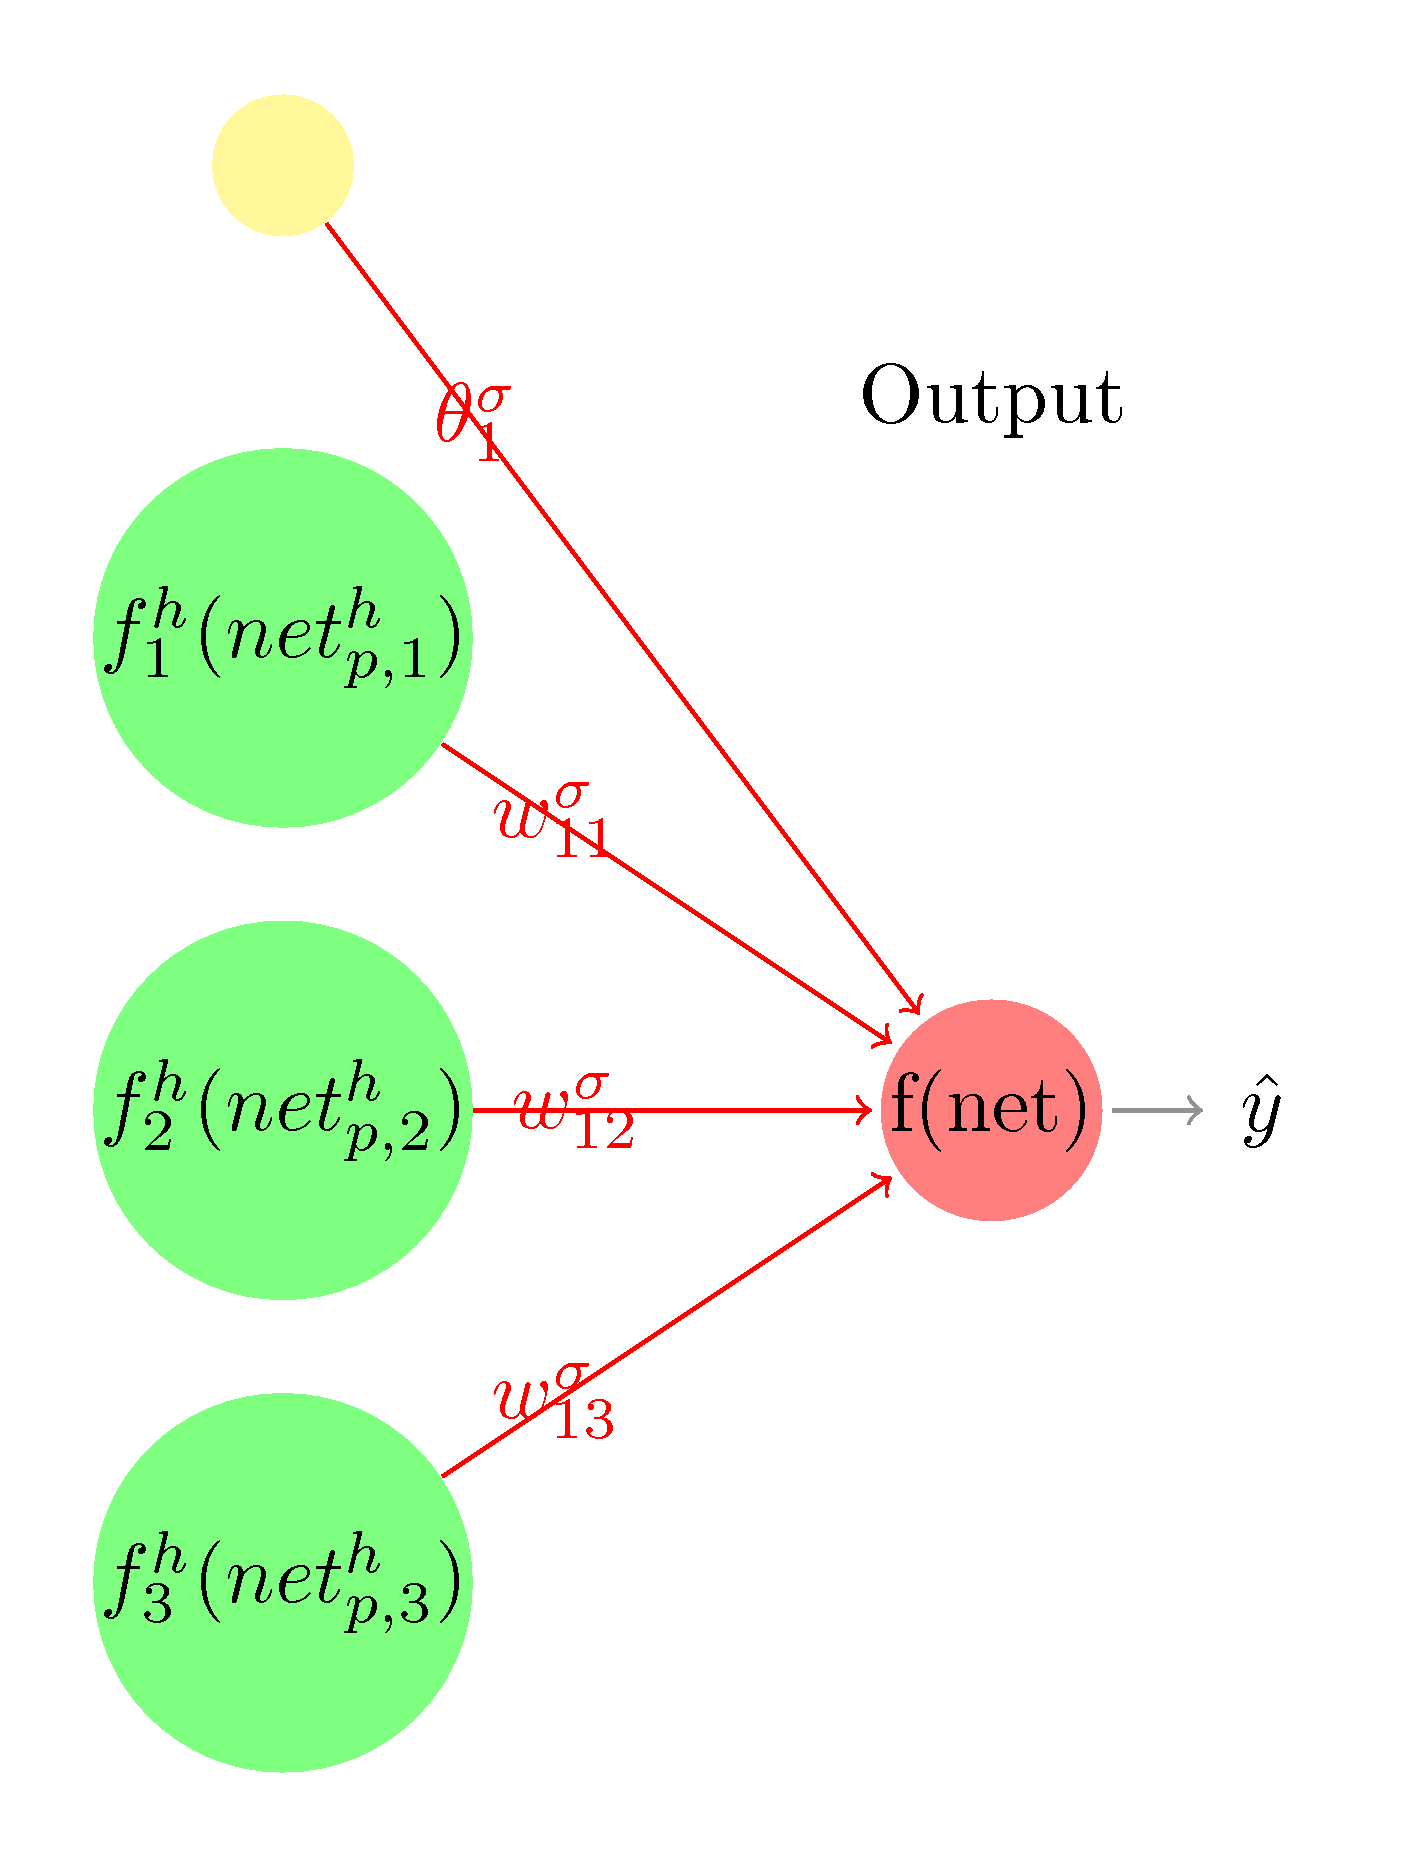

$net^{\sigma}_{p,1} = \sum_{m=1}^{3}[f_m^h(net_{p,m}^h)w_{1m}^\sigma] + \theta_{1}^{\sigma}$

m = numero de neuronio na camada escondida h.

p = patron de entrada = X

$f_{1}^{\sigma}(net_{p,1}^\sigma) = \frac{1}{1 + exp(-net_{p,1}^\sigma)}$

### Error

O valor que esperaba menos el predecido, esta resta é uma constante menos uma função sigmoidal gera uma funcão quasiconvexa. (Convex Optimization : Boyd & Vanderbergue)

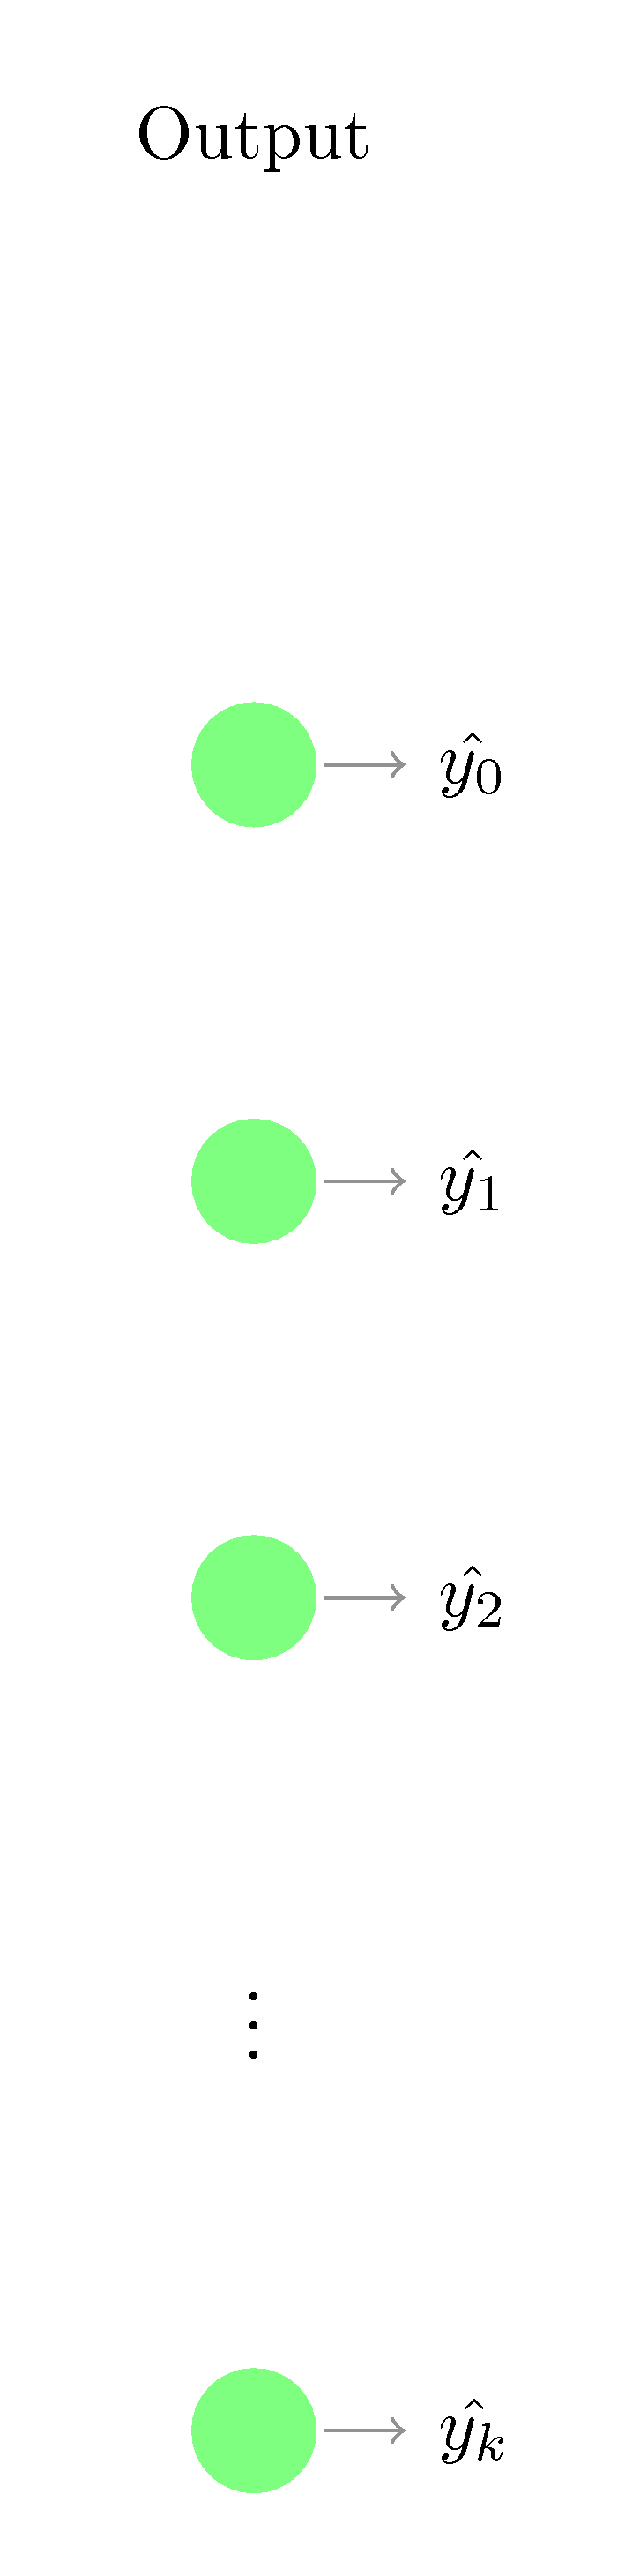

$E_1 = (E=y_1 - \hat{y}_1)$

$E_2 = (E=y_2 - \hat{y}_2)$

$E_k = (E=y_k - \hat{y}_k)$

$E_p^2=\sum_{k=1}(y_{p,k} - \hat{y}_{p,k})^2$, suma de funções quasiconvexas, dado um padrão de entrada.

Para atingir o erro mínimo e se a função é quasiconvexa, no invervalo convexo significa que se juntar qualquer dois pontos de essa funcao a funcão de erro pasa igual o abaixo(linha verde), mas nos invervalos donde não e convexa a função é maior(linha vermelha).




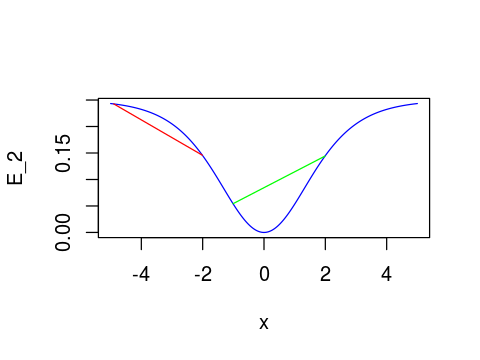

In [62]:
x <- seq(-5, 5, 0.01)
E_2 = (0.5 - sigmoid(x))^2
plot(x, E_2, col='blue',type="l")
segments(x[400], E_2[400], x[700], E_2[700], col= 'green')
segments(x[11], E_2[11], x[300], E_2[300], col= 'red')

A função de erro tem os valores de $w_1^\sigma \dots \theta_1^\sigma$

Para todo:

$w_{km}(t+1) = w_{km}^\sigma - \eta\frac{dE^2}{dw_{km}^\sigma}$, $\eta > 0$

$\theta_{k}(t+1) = \theta_{k}^\sigma - \eta\frac{dE^2}{d\theta_{k}^\sigma}$, $\eta > 0$

A resta é devido que se tem que invertir o resultado da derivada.
Se a derivada num ponto da função é negativa se precisa acercar o valor para dereita com um valor $\eta$
então se faz uma soma ao valor $w$, 
Se a derivada é positiva se precisa acercar o valor para esquerda com um valor $\eta$, então
se faz uma resta ao valor $w$.

$\frac{dE^2}{dw_{km}^\sigma} = \frac{d\sum_{x}(y_{pk} - \hat{y}_{pk})^2}{dw_{km}^\sigma}$

$\frac{dE^2}{dw_{km}^\sigma} = \frac{d\sum_k(y_{pk} - f_k^\sigma(net_{pk}^\sigma))^2}{dw_{km}^\sigma}$

$\frac{dE^2}{dw_{km}^\sigma} = \frac{d\sum_k(y_{pk} - f_k^\sigma([\sum_{m}f_m^h(net_{pm}^h)w_{km}^\sigma] + \theta_k^\sigma))^2}{dw_{km}^\sigma}$

A derivada não é de todos os k senão de só um neuronio $k$, então tiramos a soma:

$\frac{dE^2}{dw_{km}^\sigma} = 2(y_{pk} - \hat{y}_{pk})(-\frac{df_k^\sigma}{dw_{km}^\sigma})$

Por meio da regla da cadeia $\frac{df_k^\sigma}{dw_{km}^\sigma}$ é:

$\frac{df_k^\sigma}{dw_{km}} = \frac{df_k^\sigma}{dnet_{pk}^\sigma}\frac{dnet_{pk}^\sigma}{dw_{km}^\sigma}$

Dado:

$f_k^\sigma(net_{pk}^\sigma)= \frac{1}{1 + exp(-net_{pk}^\sigma)}$

Então a derivada de $\frac{df_k^\sigma}{dnet_{pk}^\sigma} $ é:

$\frac{df_k^\sigma}{dnet_{pk}^\sigma} = f_k^\sigma(net_{pk}^\sigma)(1 - f_k^\sigma(net_{pk}^\sigma))$

Dado:

$net_{pk}^\sigma = \sum_{m}f_m^h(net_{pm}^h)w_{km}^\sigma + \theta_k^\sigma)$ 

Então a derivada de $\frac{dnet_{pk}^\sigma}{dw_{km}^\sigma}$ é:

$\frac{dnet_{pk}^\sigma}{dw_{km}^\sigma} = f_{m}^{h}(net_{pm}^{h})$

Juntando os cálculos termos:

$w_{km}(t+1) = w_{km}^\sigma(t) + \eta2(y_{pk} - \hat{y}_{pk})f_k^\sigma(net_{pk}^\sigma)(1 - f_k^\sigma(net_{pk}^\sigma))f_{m}^{h}(net_{pm}^{h})$

$\theta_{k}(t+1) = \theta_{k}^\sigma(t) + \eta2(y_{pk} - \hat{y}_{pk})f_k^\sigma(net_{pk}^\sigma)(1 - f_k^\sigma(net_{pk}^\sigma))1$

Se pode mudar a função sigmoidal mas tem que ser uma função quasiconvexa ou convexa senão não se consegue esse minimo, então procure o minimo para adaptar os outros termos em função de esse erro minimo, e quando adapta esses outros termos em função de esse erro chega num resultado que eu quero, chega nessa adaptação que vai me dar uma boa configuração da rede o seja um bom treinamento.

## Camada de escondida

Esta camada disse quantos neuronios eu terei para separar meu espaço.
Por exemplo na função XOR:

In [69]:
x1 <- c(0, 0, 1, 1)
x2 <- c(0, 1, 0, 1)

logic = data.frame(x1,x2)
logic$XOR = as.numeric(xor(x1,x2))
logic

x1,x2,XOR
0,0,0
0,1,1
1,0,1
1,1,0


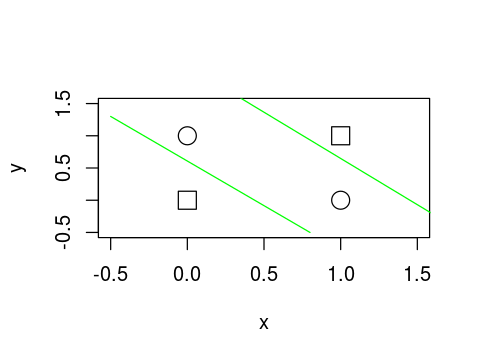

In [85]:
plot(x=logic$x1, y=logic$x2, pch=logic$XOR, cex=2, xlab="x", ylab="y", xlim=c(-0.5,1.5),ylim=c(-0.5,1.5))
segments(0.8, -0.5, -0.5, 1.3, col= 'green')
segments(1.8, -0.5, -0.5, 2.8, col= 'green')

Se precisa de dois hiperplanos para separar os dados.

### Erro
$E_p^2 = \sum_k[y_{pk-f_k^\sigma(\sum_{j=1}[f_{j}^{h}(net_{pj}^{h})w_{kj}^{\sigma}] + \theta_k^\sigma)}]^2$

$E_p^2 = \sum_k[y_{pk-f_k^\sigma(\sum_{j=1}[f_{j}^{h}(\sum_i[x_{pi}w_{ji}^h] + \theta_{j}^h)w_{kj}^{\sigma}) + \theta_k^\sigma]}]^2$

Agora se adapta o peso $w$ e vias $\theta$ da camada escondida:

$w_{ji}(t+1) = w_{ji}^h - \eta\frac{dE^2}{dw_{ji}^h}$, $\eta > 0$

$\theta_{j}(t+1) = \theta_{j}^\sigma - \eta\frac{dE^2}{d\theta_{j}^h}$, $\eta > 0$

$\frac{dE^2}{dw_{ji}^h} = \sum_k2(y_{pk} - \hat{y}_{pk})\frac{-d\hat{y}_{pk}}{dw_{ji}^h}$

$\frac{dE^2}{dw_{ji}^h} = \sum_k-2(y_{pk} - \hat{y}_{pk})\frac{df_k^\sigma}{dnet_{pk}^\sigma}\frac{dnet_{pk}^\sigma}{f_j^h}\frac{f_j^h}{dnet_{pj}^h}\frac{dnet_{pj}^h}{dw_{ji}^h}$

Então as derivadas de $w$ e $\theta$

$\frac{dE^2}{dw_{ji}^h} = \sum_k-2(y_{pk} - \hat{y}_{pk})f_k^\sigma(1-f_k^\sigma)w_{kj}^\sigma f_j^h(1-f_j^h)x_{pi}$

$\frac{dE^2}{d\theta_{j}^h} = \sum_k-2(y_{pk} - \hat{y}_{pk})f_k^\sigma(1-f_k^\sigma)w_{kj}^\sigma f_j^h(1-f_j^h)1$